# About
Authors: Shahar and Shlomi

[Github](https://github.com/shachar700/DataAnalysis_ElectricVehicles)



Questions:

Shahar
- Top 7 companies with total amount of vehicles
- Top 7 models with total amount of vehicles
- Popular companies in each county
- Popular models in each county

Shlomi
- Vehicles per state
- Vehicles per county
- Vehicles per city
- Vehicles per electric utility

Later
- Vehicles per legistrative district (handle na values) **
- Electric Range per model (handle na values) **
- graph Make and electric range

# Comments
* turn dtype to categories where needed

* handle missing values: use Linear Regression/KNN to predict electric range,

* split categories and turn them to binary values.
dummies for Electric Utility and handle
higher index to dummies

authors: Shahar and Shlomi

[Github](https://github.com/shachar700/DataAnalysis_ElectricVehicles)

Column Name -	Description

VIN (1-10) - First 10 characters of the Vehicle Identification Number.

County - The county where the vehicle is registered or located.

City - The city where the vehicle is registered or located.

State - The U.S. state abbreviation (e.g., WA for Washington).

Postal Code - ZIP/postal code of the vehicle's location.

Model Year - The year the vehicle was manufactured.

Make - The manufacturer (e.g., Tesla, Nissan).

Model - The specific model of the car (e.g., Model 3, Leaf).

Electric Vehicle Type - Type of EV (Battery Electric Vehicle (BEV), Plug-in Hybrid Electric Vehicle (PHEV), etc.).

Clean Alternative Fuel Vehicle (CAFV) Eligibility - Indicates whether the vehicle qualifies under CAFV rules.

Electric Range - How many miles the vehicle can travel on electricity alone.

Base MSRP - Manufacturer's Suggested Retail Price at base level (starting price).

Legislative District - Legislative district associated with the vehicle's location.

DOL Vehicle ID - Department of Licensing Vehicle ID (state-assigned).

Vehicle Location - More detailed info about where the vehicle is located.

Electric Utility - The electric company servicing that area.

2020 Census Tract - Census tract identifier from the 2020 census (used for demographic/geographic analysis).

# Installs

# Libraries

In [64]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-process

In [65]:
electric_vehicles_url = "https://raw.githubusercontent.com/shachar700/DataAnalysis_ElectricVehicles/refs/heads/main/data/Electric_Vehicle_Population_Data.csv"

def download_file(url, file_name):
  response = requests.get(url)
  if response.status_code == 200:
    with open(file_name, "wb") as file:
        file.write(response.content)
    print(f"Downloaded: {file_name}")

download_file(electric_vehicles_url, "Electric_Vehicle_Population_Data.csv")

Downloaded: Electric_Vehicle_Population_Data.csv


In [66]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [68]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235692.000000,235656.000000,235656.000000,235198.000000,2.356920e+05,2.356890e+05
mean,98177.656463,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.218661,2.991908,84.045829,7177.668305,14.904644,6.799098e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [95]:
dummies = df["Electric Utility"].str.get_dummies("|")
# print(dummies.columns.tolist())
# df = pd.concat([df, dummies], axis=1)
dummies.head(3)
display(dummies.sum().sort_values())
df.head(3)

['ALDER MUTUAL LIGHT CO, INC', 'AVISTA CORP', 'BENTON RURAL ELECTRIC ASSN', 'BIG BEND ELECTRIC COOP, INC', 'BONNEVILLE POWER ADMINISTRATION', 'CITY OF BLAINE - (WA)', 'CITY OF CENTRALIA - (WA)', 'CITY OF CHENEY - (WA)', 'CITY OF CHEWELAH', 'CITY OF COULEE DAM - (WA)', 'CITY OF ELLENSBURG - (WA)', 'CITY OF MCCLEARY - (WA)', 'CITY OF MILTON - (WA)', 'CITY OF PORT ANGELES - (WA)', 'CITY OF RICHLAND - (WA)', 'CITY OF SEATTLE - (WA)', 'CITY OF SUMAS - (WA)', 'CITY OF TACOMA - (WA)', 'COLUMBIA RURAL ELEC ASSN, INC', 'ELMHURST MUTUAL POWER & LIGHT CO', 'INLAND POWER & LIGHT COMPANY', 'LAKEVIEW LIGHT & POWER', 'MODERN ELECTRIC WATER COMPANY', 'NESPELEM VALLEY ELEC COOP, INC', 'NO KNOWN ELECTRIC UTILITY SERVICE', 'NON WASHINGTON STATE ELECTRIC UTILITY', 'OHOP MUTUAL LIGHT COMPANY, INC', 'OKANOGAN COUNTY ELEC COOP, INC', 'ORCAS POWER & LIGHT COOP', 'PACIFICORP', 'PARKLAND LIGHT & WATER COMPANY', 'PENINSULA LIGHT COMPANY', 'PORTLAND GENERAL ELECTRIC CO', 'PUD 1 OF SNOHOMISH COUNTY', 'PUD NO 1 OF 

,0
"ALDER MUTUAL LIGHT CO, INC",3
"NESPELEM VALLEY ELEC COOP, INC",3
CITY OF COULEE DAM - (WA),9
CITY OF SUMAS - (WA),12
CITY OF CHEWELAH,13
...,...
PUD NO 1 OF CLARK COUNTY - (WA),14080
CITY OF SEATTLE - (WA),40108
BONNEVILLE POWER ADMINISTRATION,47087
CITY OF TACOMA - (WA),140140


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,PUD NO 1 OF WHATCOM COUNTY,PUD NO 2 OF GRANT COUNTY,PUD NO 2 OF PACIFIC COUNTY,PUD NO 3 OF MASON COUNTY,PUGET SOUND ENERGY INC,TANNER ELECTRIC COOP,TOWN OF EATONVILLE - (WA),TOWN OF RUSTON - (WA),TOWN OF STEILACOOM,VERA IRRIGATION DISTRICT #15
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,1,0,0,0,0,0
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0,0,0,0,1,0,0,0,0,0


In [71]:
display(df.isnull().sum())

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [72]:
# df['Make'].value_counts()

In [73]:
# df[['Make','Model']].value_counts()

## drop unused columns

In [69]:
df = df.drop(columns=["Base MSRP", "Vehicle Location", "DOL Vehicle ID", "2020 Census Tract"])

## Handle missing data

In [97]:
display(df[df["County"].isna()])
df = df.dropna(subset=["County"])
#df.loc[df["Electric Range"] == 0.0, "Electric Range"] = np.nan
# display(df.isnull().sum())
# df.head(3)
# display(df[df["Electric Range"].isna()])

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,PUD NO 1 OF WHATCOM COUNTY,PUD NO 2 OF GRANT COUNTY,PUD NO 2 OF PACIFIC COUNTY,PUD NO 3 OF MASON COUNTY,PUGET SOUND ENERGY INC,TANNER ELECTRIC COOP,TOWN OF EATONVILLE - (WA),TOWN OF RUSTON - (WA),TOWN OF STEILACOOM,VERA IRRIGATION DISTRICT #15


# Vehicles per state
Conclusion: as most of the data was collected in WA the df shows they have the most vehicles (235198!), and followed by CA (but with only 112 vehicles)
Thus we can conclude that any vehicle not in WA is an outlier

<ipython-input-74-c7d0ad8ac159>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="State", data=vehicles_per_state, palette="Blues_d")


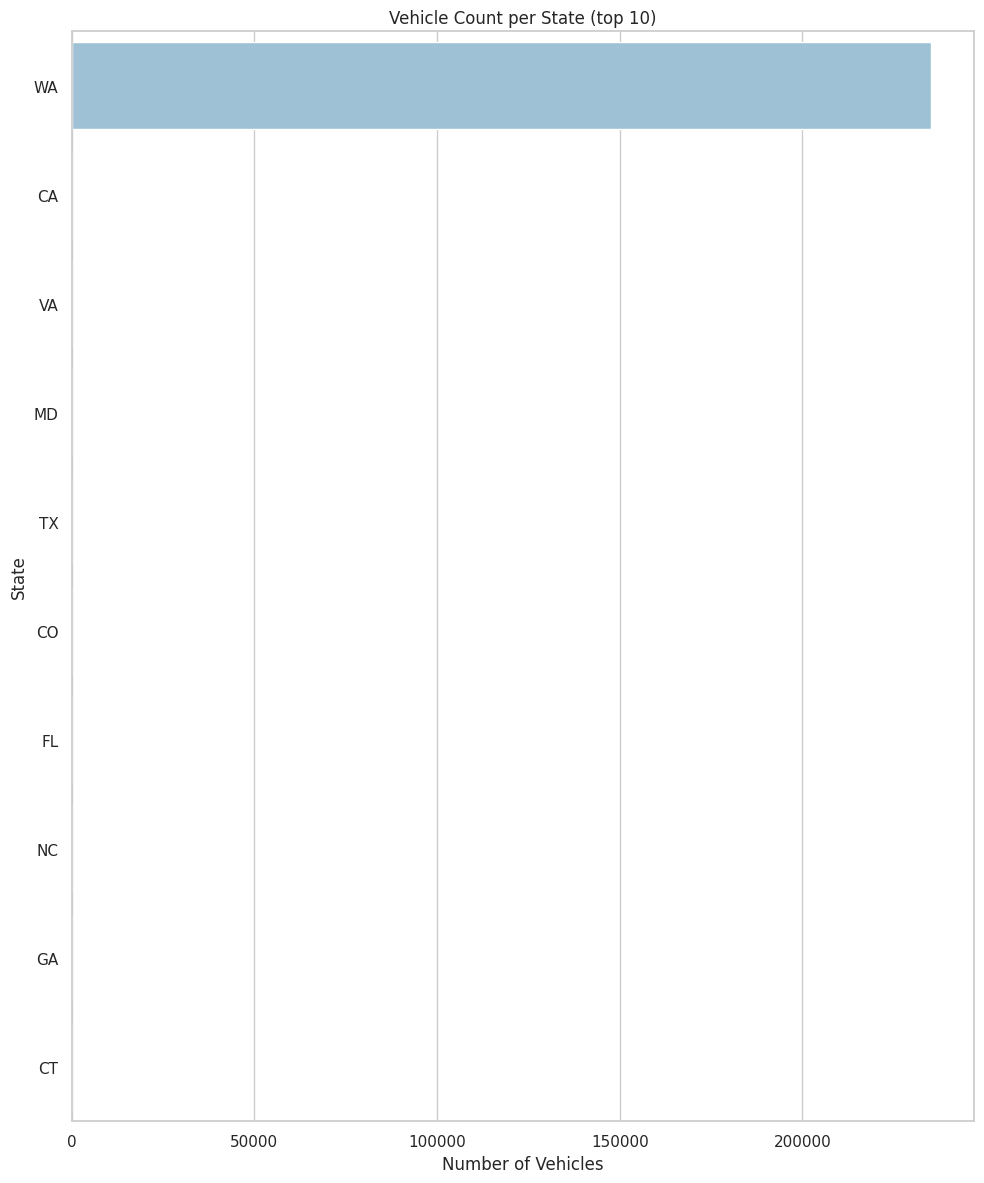

In [74]:
vehicles_per_state = df.groupby(by="State").size().reset_index(name="Count")

vehicles_per_state = vehicles_per_state.sort_values("Count", ascending=False).head(10)

plt.figure(figsize=(10, 12))
sns.barplot(x="Count", y="State", data=vehicles_per_state, palette="Blues_d")

plt.title("Vehicle Count per State (top 10)")
plt.xlabel("Number of Vehicles")
plt.ylabel("State")
plt.tight_layout()
plt.show()


<ipython-input-75-e1031c229e9e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="State", data=vehicles_per_state, palette="Blues_d")


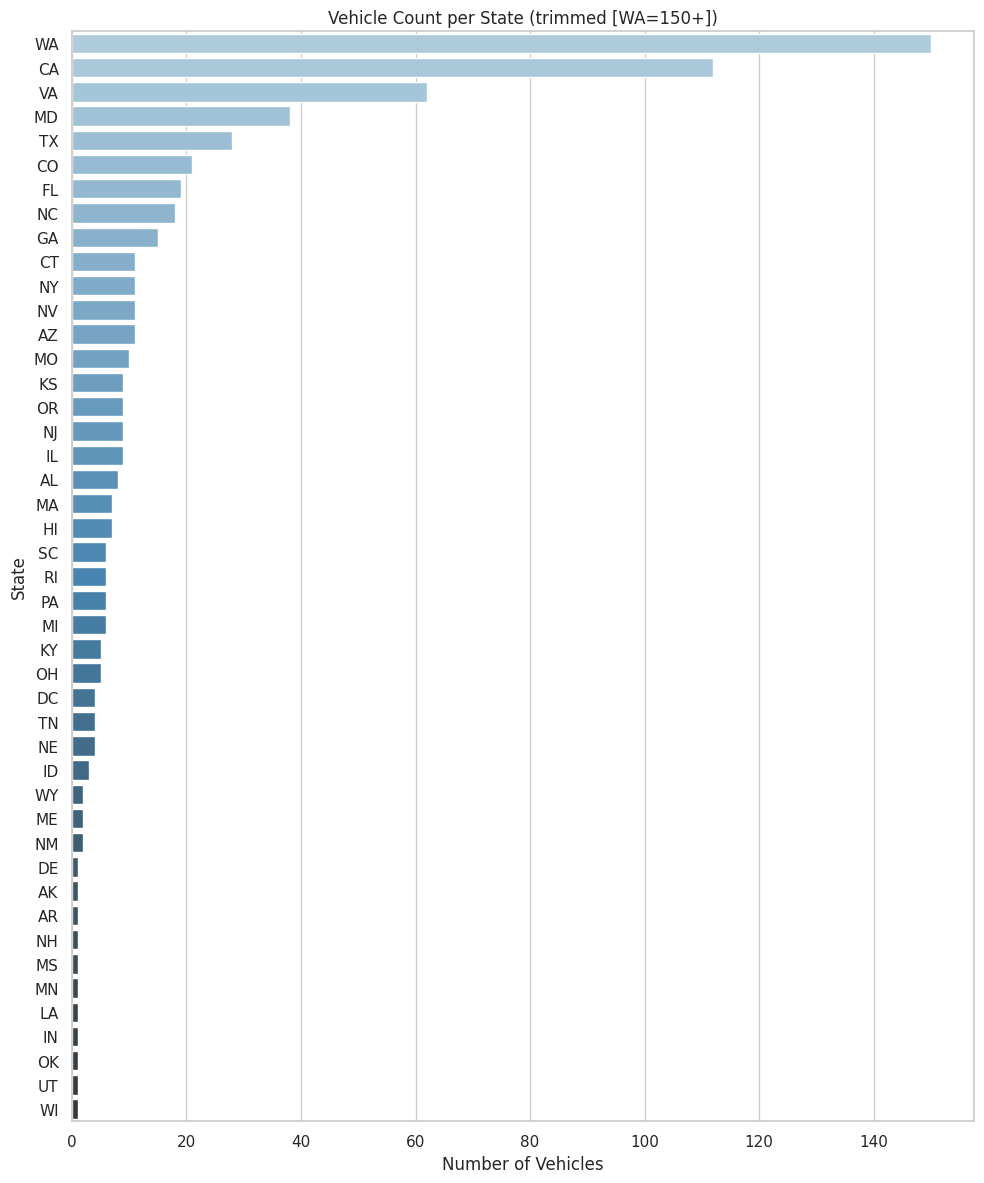

In [75]:
vehicles_per_state = df.groupby(by="State").size().reset_index(name="Count")
vehicles_per_state = vehicles_per_state.sort_values("Count", ascending=False)
vehicles_per_state.loc[vehicles_per_state["State"] == "WA", "Count"] = 150

plt.figure(figsize=(10, 12))
sns.barplot(x="Count", y="State", data=vehicles_per_state, palette="Blues_d")

plt.title("Vehicle Count per State (trimmed [WA=150+])")
plt.xlabel("Number of Vehicles")
plt.ylabel("State")
plt.tight_layout()
plt.show()


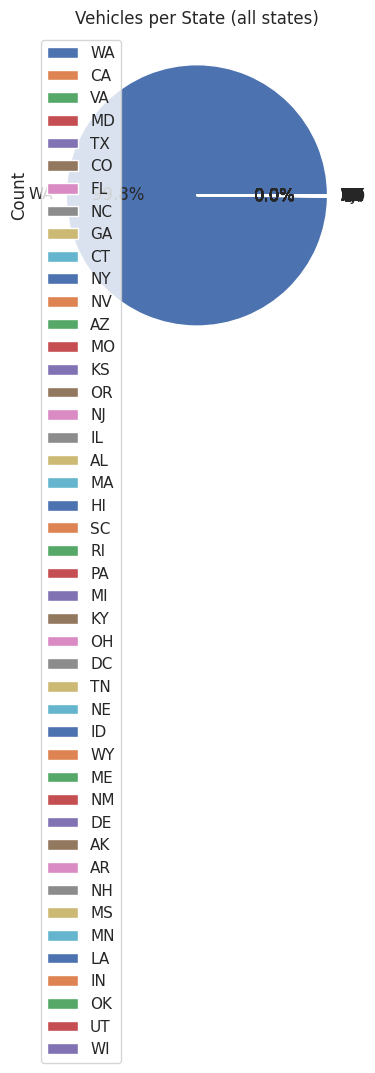

In [76]:
vehicles_per_state = df.groupby(by="State").size().reset_index(name="Count")
vehicles_per_state = vehicles_per_state.sort_values("Count", ascending=False)

# Set the index to "State" so pie chart labels use it
vehicles_per_state.set_index("State")["Count"].plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title="Vehicles per State (all states)",
    legend=True
)

plt.tight_layout()
plt.show()


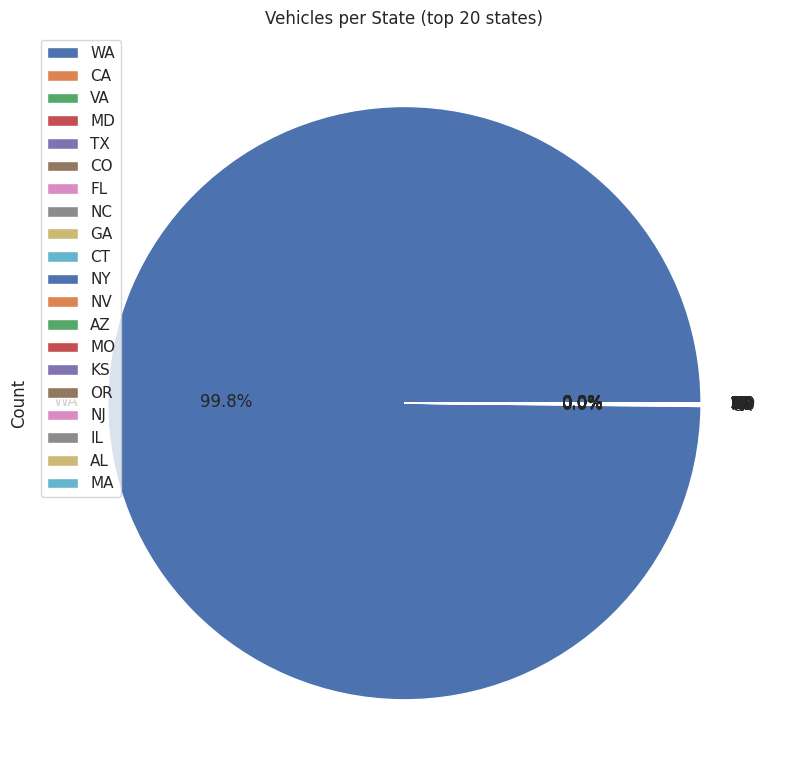

In [77]:
vehicles_per_state = df.groupby(by="State").size().reset_index(name="Count")
vehicles_per_state = vehicles_per_state.sort_values("Count", ascending=False).head(20)

# Set the index to "State" so pie chart labels use it
vehicles_per_state.set_index("State")["Count"].plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title="Vehicles per State (top 20 states)",
    legend=True
)

plt.tight_layout()
plt.show()


# Vehicles per WA county

Conclusion: King county has the most (118711) by a big margin, followed by Snohomish
Thus we can conclude that any vehicle not in King county is an outlier

,County,Count
94,King,118711
178,Snohomish,28814
148,Pierce,19256
36,Clark,14101
191,Thurston,8595
96,Kitsap,7901
181,Spokane,6582
204,Whatcom,5703
16,Benton,3043
176,Skagit,2677


<ipython-input-89-177765d8e31e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicles_per_county, x='Count', y='County', palette='YlOrRd')


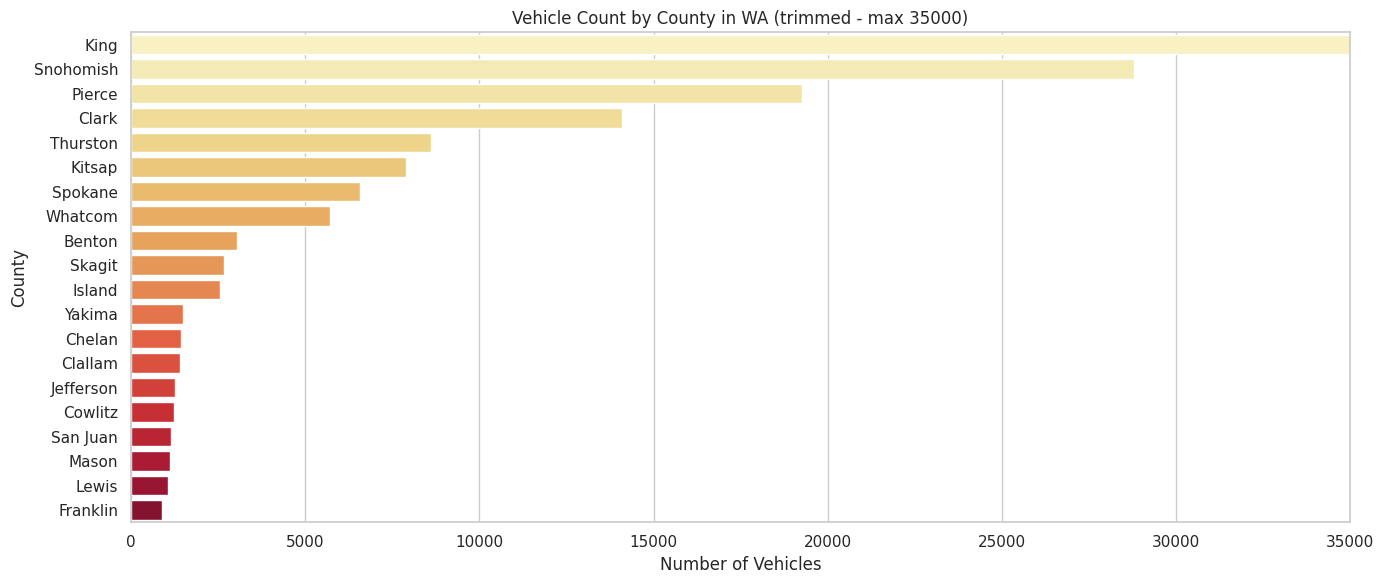

<ipython-input-89-177765d8e31e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicles_per_county, x='Count', y='County', palette='YlOrRd')


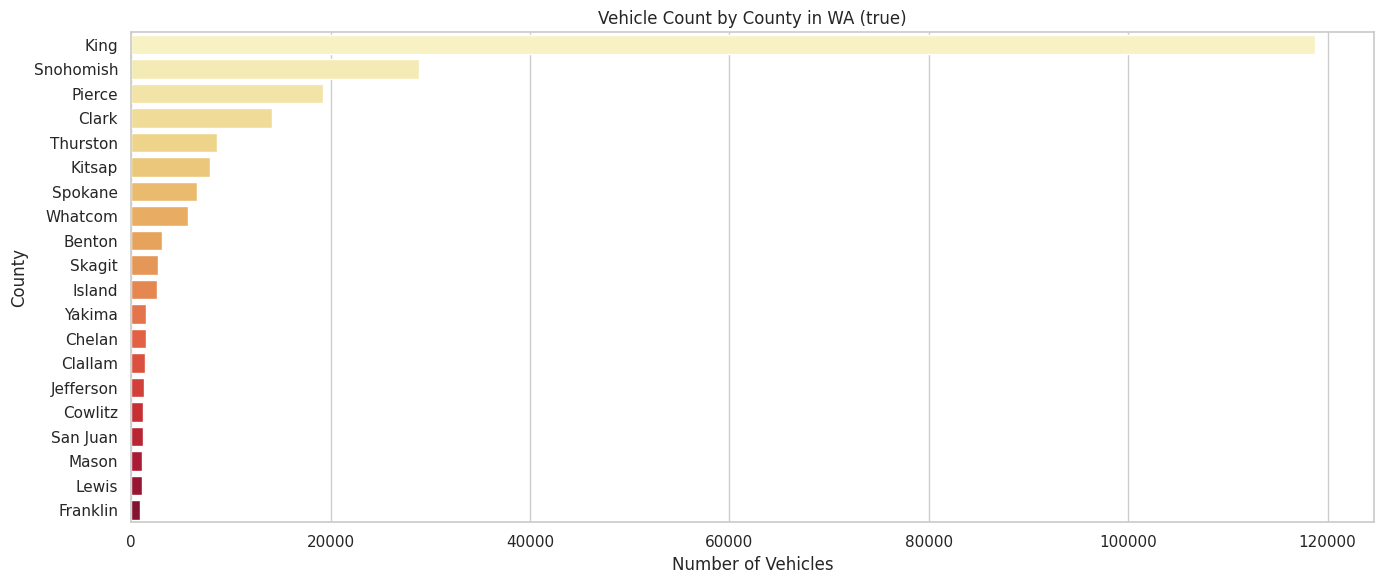

In [89]:
filtered_df = df[ df["State"] == 'WA']

vehicles_per_county = df.groupby(by="County").size().reset_index(name="Count")
vehicles_per_county = vehicles_per_county.sort_values("Count", ascending=False)
vehicles_per_county = vehicles_per_county.head(n=20)

display(vehicles_per_county)
maxVal = 35000

plt.figure(figsize=(14, 6))
sns.barplot(data=vehicles_per_county, x='Count', y='County', palette='YlOrRd')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.title(f'Vehicle Count by County in WA (trimmed - max {maxVal})')
plt.xlim(0, maxVal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=vehicles_per_county, x='Count', y='County', palette='YlOrRd')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.title(f'Vehicle Count by County in WA (true)')
plt.tight_layout()
plt.show()

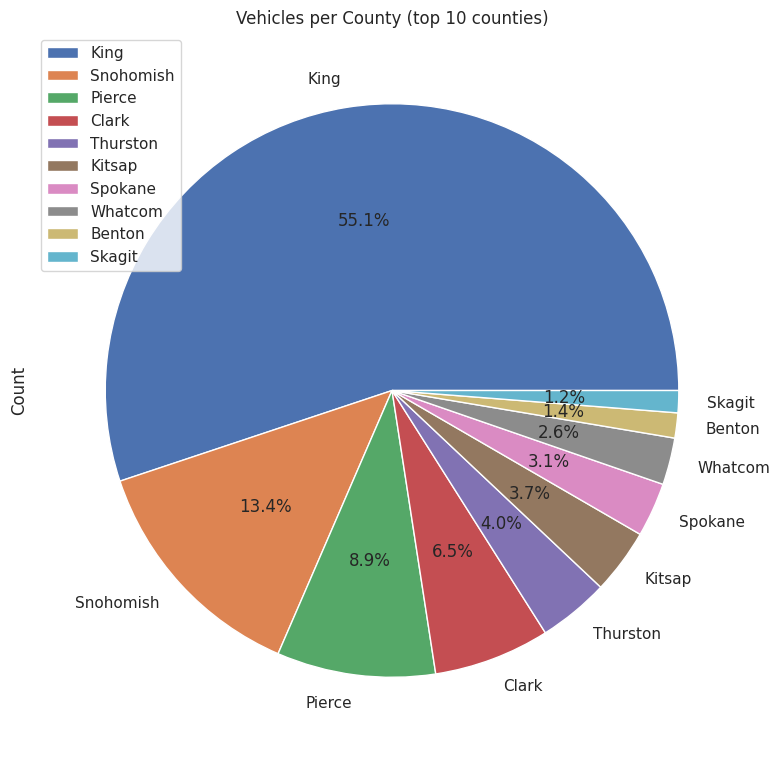

In [88]:
filtered_df = df[ df["State"] == 'WA']
vehicles_per_county = filtered_df.groupby(by="County").size().reset_index(name="Count")
vehicles_per_county = vehicles_per_county.sort_values("Count", ascending=False).head(10)

# Set the index to "State" so pie chart labels use it
vehicles_per_county.set_index("County")["Count"].plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title="Vehicles per County (top 10 counties)",
    legend=True
)

plt.tight_layout()
plt.show()


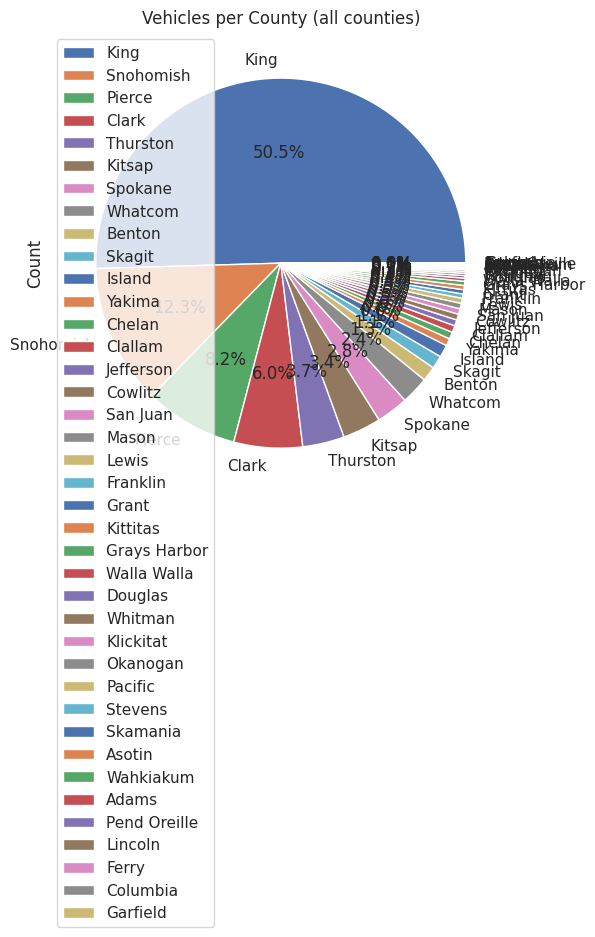

In [90]:
filtered_df = df[ df["State"] == 'WA']
vehicles_per_county = filtered_df.groupby(by="County").size().reset_index(name="Count")
vehicles_per_county = vehicles_per_county.sort_values("Count", ascending=False)

# Set the index to "State" so pie chart labels use it
vehicles_per_county.set_index("County")["Count"].plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title="Vehicles per County (all counties)",
    legend=True
)

plt.tight_layout()
plt.show()


# Removing outliers

In [78]:
filtered_df = df[ (df["State"] == 'WA') | (df["County"] == 'King')]
# filtered_df["City"] = filtered_df["City"].astype("category")
# filtered_df["Make"] = filtered_df["Make"].astype("category")
# filtered_df["Model"] = filtered_df["Model"].astype("category")

# Most popular vehicle per city
Conclusion: Tesla is the most popular in the top 20 cities with the most vehicles

In [79]:
def vehicles_per_feature(feature):
  make_df = filtered_df.pivot_table(
    index=feature,
    columns="Make",
    values="Model",
    aggfunc="count",
    fill_value=0
  )

  # only the top 5 makers
  top_makes = make_df.sum(axis=0).nlargest(5).index
  make_df_top_makes = make_df.loc[:, top_makes]
  # only the top 20 of that feature
  top_20 = make_df_top_makes.sum(axis=1).nlargest(20).index
  make_df_top20 = make_df_top_makes.loc[top_20]

  make_df_filtered_pcts = make_df_top20.div(make_df_top20.sum(axis="columns"), axis="index")
  # display(make_df_filtered_pcts)
  make_df_filtered_pcts.plot.bar(stacked=True)

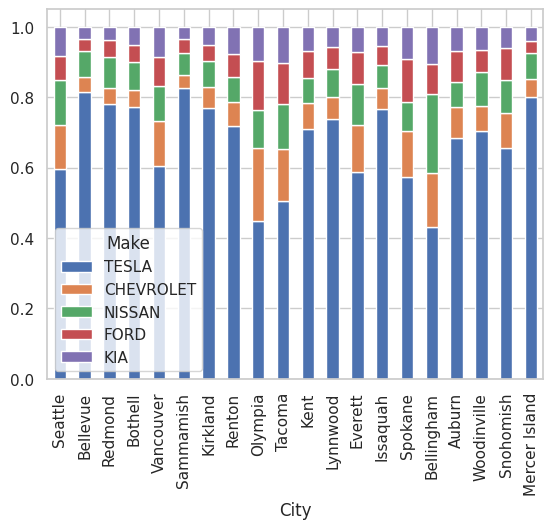

In [80]:
vehicles_per_feature("City")

# Vehicles per electric utility
Conclusion: We see that 'Puget Sound Energy Inc' is the utility that service the most vehicles, followed closly by 'City of Tacoma'

,count
Electric Utility,
PUGET SOUND ENERGY INC,140816
CITY OF TACOMA - (WA),140140
BONNEVILLE POWER ADMINISTRATION,47087
CITY OF SEATTLE - (WA),40108
PUD NO 1 OF CLARK COUNTY - (WA),14080
PENINSULA LIGHT COMPANY,12318
PUD NO 1 OF WHATCOM COUNTY,5703
AVISTA CORP,4721
INLAND POWER & LIGHT COMPANY,4482


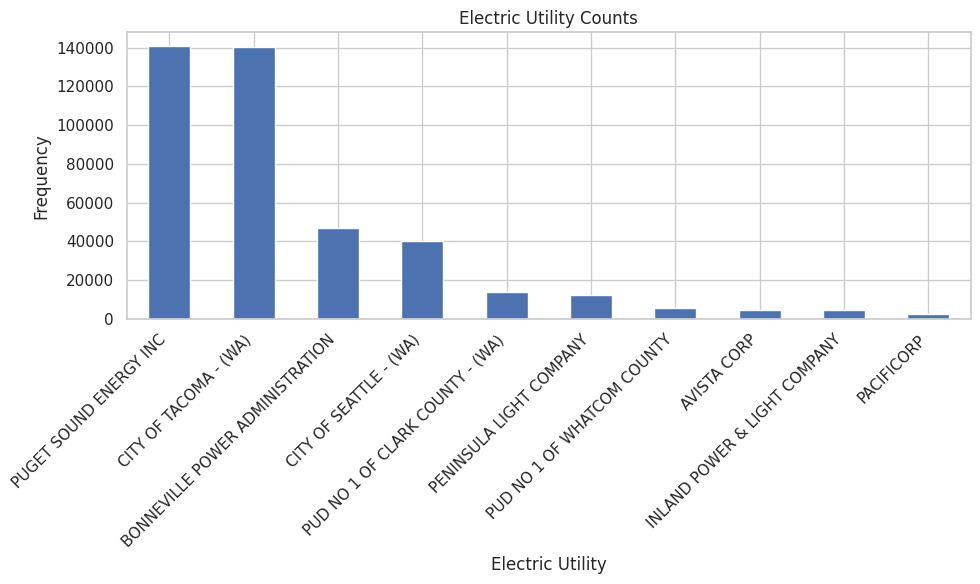

In [130]:
utilities_df = filtered_df['Electric Utility'].str.split(r'\|+', regex=True).explode()
utility_counts = utilities_df.value_counts().head(10)
display(utility_counts)

plt.figure(figsize=(10, 6))
utility_counts.plot(kind='bar')
plt.title('Electric Utility Counts')
plt.xlabel('Electric Utility')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Models per Make (top 3 make)

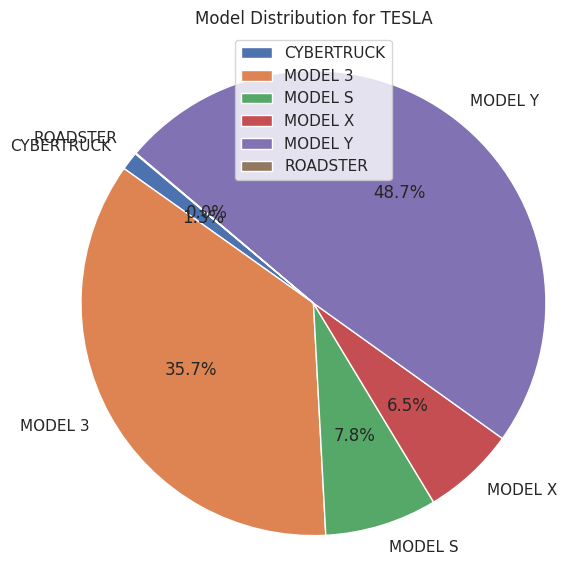

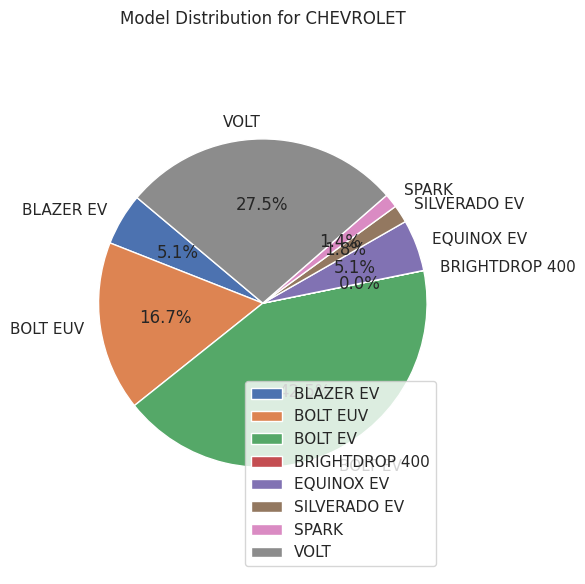

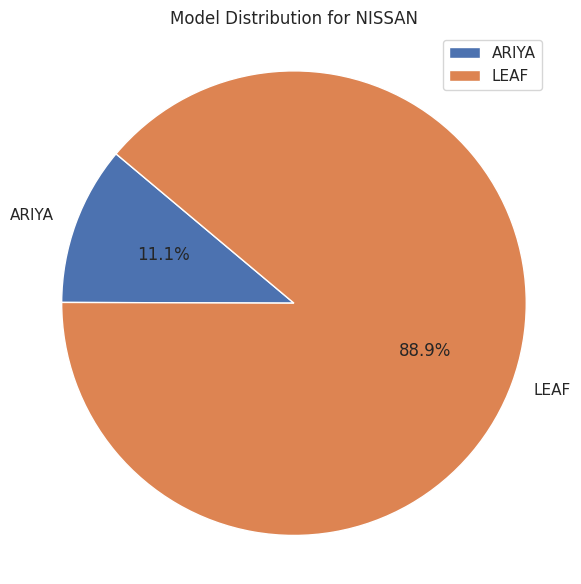

In [83]:
models_per_make = df.groupby(["Make","Model"], dropna=False).size()

models_per_make = models_per_make.reset_index(name='Count')

top_makes = (
    models_per_make.groupby('Make')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

for make in top_makes:
    make_data = models_per_make[models_per_make['Make'] == make]
    plt.figure(figsize=(6, 6))
    plt.pie(make_data['Count'], labels=make_data['Model'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Model Distribution for {make}')
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
    plt.tight_layout()
    plt.legend()
    plt.show()

# Vehicle count per company

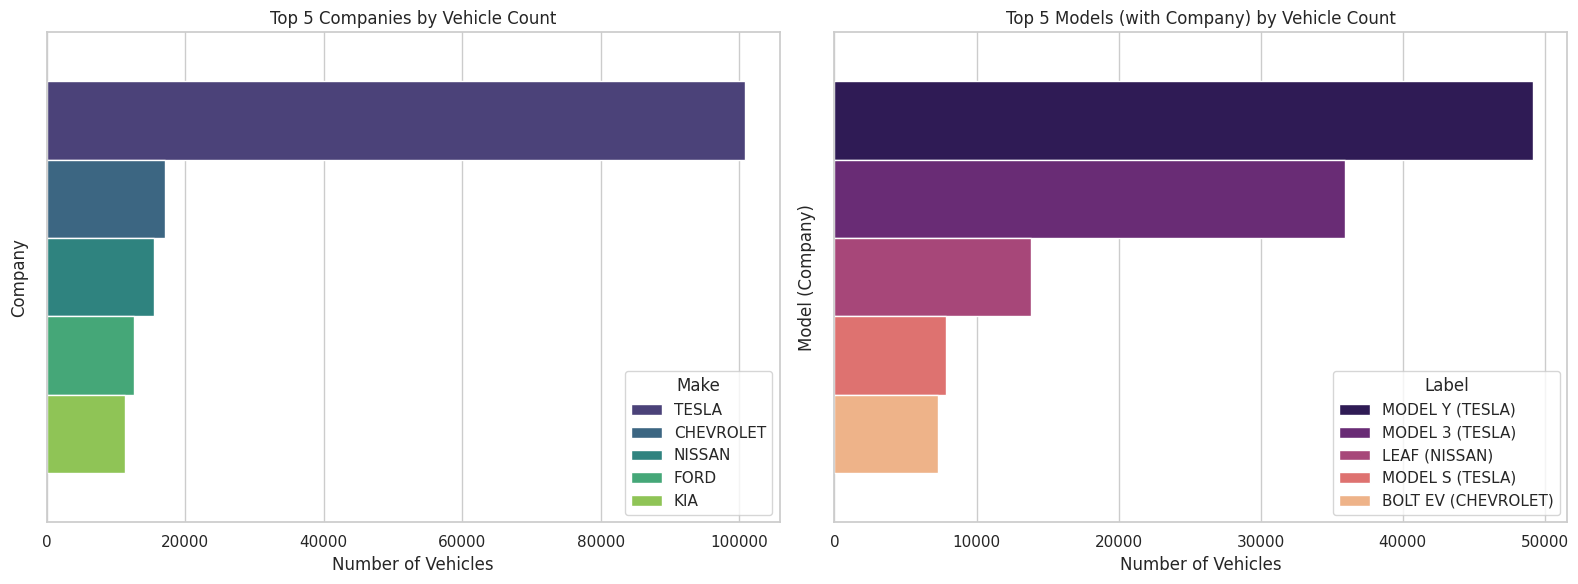

In [91]:
# Set plot style
sns.set(style="whitegrid")

# Top 5 companies (makes)
top_makes = filtered_df['Make'].value_counts().nlargest(5)

# Group by both Model and Make to count unique (Model, Make) combinations
model_make_counts = filtered_df.groupby(['Model', 'Make']).size().reset_index(name='Count')

# Sort by count and get top 5
top_models = model_make_counts.sort_values(by='Count', ascending=False).head(5)

# Create label: "Model (Make)"
top_models['Label'] = top_models['Model'] + " (" + top_models['Make'] + ")"

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar chart for top makes
sns.barplot(x=top_makes.values, hue=top_makes.index, ax=axes[0], palette="viridis")
axes[0].set_title('Top 5 Companies by Vehicle Count')
axes[0].set_xlabel('Number of Vehicles')
axes[0].set_ylabel('Company')

# Bar chart for top models with make
sns.barplot(x=top_models['Count'], hue=top_models['Label'], ax=axes[1], palette="magma")
axes[1].set_title('Top 5 Models (with Company) by Vehicle Count')
axes[1].set_xlabel('Number of Vehicles')
axes[1].set_ylabel('Model (Company)')

plt.tight_layout()
plt.show()


# most popular make per county

In [131]:
make_counts = filtered_df.groupby(['County', 'Make']).size().reset_index(name='Count')
top_makes_by_county = make_counts.sort_values(['County', 'Count'], ascending=[True, False])
top_makes_per_county = top_makes_by_county.groupby('County').first().reset_index()

print("Top Companies (Makes) in Each County:")
display(top_makes_per_county.sort_values(by="Count", ascending=False).head(10))  # Show first 10 for brevity

Top Companies (Makes) in Each County:


,County,Make,Count
16,King,TESLA,54709
30,Snohomish,TESLA,14306
26,Pierce,TESLA,7794
5,Clark,TESLA,5752
33,Thurston,TESLA,2750
17,Kitsap,TESLA,2487
31,Spokane,TESLA,2364
36,Whatcom,TESLA,1704
2,Benton,TESLA,1248
28,Skagit,TESLA,898


# Top model per county

In [137]:
model_counts = filtered_df.groupby(['County', "Make", 'Model']).size().reset_index(name='Count')
top_models_by_county = model_counts.sort_values(['County', 'Count'], ascending=[True, False])
top_models_per_county = top_models_by_county.groupby('County').first().reset_index()

print("\nTop Models in Each County:")
display(top_models_per_county.sort_values(by="Count", ascending=False).head(10))


Top Models in Each County:


,County,Make,Model,Count
16,King,TESLA,MODEL Y,26896
30,Snohomish,TESLA,MODEL Y,7745
26,Pierce,TESLA,MODEL Y,3569
5,Clark,TESLA,MODEL Y,2683
33,Thurston,TESLA,MODEL Y,1304
31,Spokane,TESLA,MODEL Y,1188
17,Kitsap,TESLA,MODEL Y,1112
36,Whatcom,TESLA,MODEL Y,786
2,Benton,TESLA,MODEL 3,529
28,Skagit,TESLA,MODEL Y,409


# crosstab

In [135]:
import pandas as pd

# Step 1: Count makes per county
make_counts = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Step 2: Get top 10 counties by total vehicle count
top_counties = (
    make_counts.groupby('County')['Count'].sum()
    .nlargest(10)
    .index
)

# Step 3: Filter to only include top counties
filtered_counts = make_counts[make_counts['County'].isin(top_counties)]

# Step 4: Get top 10 makes across the top counties
top_makes = (
    filtered_counts.groupby('Make')['Count'].sum()
    .nlargest(10)
    .index
)

# Step 5: Filter to only include top makes
filtered_counts = filtered_counts[filtered_counts['Make'].isin(top_makes)]

# Step 6: Create a crosstab (County x Make with Count as values)
crosstab = pd.crosstab(
    index=filtered_counts['County'],
    columns=filtered_counts['Make'],
    values=filtered_counts['Count'],
    aggfunc='sum',
    dropna=False
).fillna(0).astype(int)

# Display the crosstab
display(crosstab)


Make,BMW,CHEVROLET,FORD,HYUNDAI,KIA,NISSAN,RIVIAN,TESLA,TOYOTA,VOLVO
County,,,,,,,,,,
Benton,130,280,246,82,134,153,42,1248,192,32
Clark,534,1068,773,476,731,864,274,5757,1060,255
King,5679,6886,4746,3737,5046,7395,3824,54709,3625,3462
Kitsap,315,721,504,324,523,701,332,2487,355,270
Pierce,703,1518,1367,553,1191,1240,648,7794,734,425
Skagit,63,324,191,127,154,171,143,898,147,54
Snohomish,996,1786,1584,892,1290,1961,629,14306,872,602
Spokane,275,511,486,165,381,313,108,2364,289,89
Thurston,204,1165,845,254,589,639,117,2750,455,171
